In [37]:
import numpy as np
import scipy as sp
from numpy import linalg as nla
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.mplot3d import Axes3D

In [38]:
delta=np.linspace(0.167,0.382,100)
a=6.8927
k=0.4032
c=2.3952
rho=np.linspace(0.21,0.51,100)
def model(r,d,p,tc):
    x=r[0]
    y=r[1]
    z=r[2]
    a=7.3939+0.002*np.sin(1.8*tc)
    x1=1.0*(p*d*(x*x-a*x)+x*(x+y+c-c*np.tanh(x+z)))
    y1=-1.0*p*d*(a*y+x*x)
    z1=d*(k-z-0.5*x)
    return (np.array([x1,y1,z1]))

In [39]:
def jac(r,d,p,tc):
    x=r[0]
    y=r[1]
    z=r[2]
    M=np.array([[-c*np.tanh(x + z) + c + d*p*((-7.3939+0.002*np.sin(1.8*tc)) + 2*x) + x*(-c*(1 - np.tanh(x + z)**2) + 1) + x + y,x,-c*x*(1 - np.tanh(x + z)**2)],
                [-2*x*p*d,-p*d*(7.3939+0.002*np.sin(1.8*tc)),0],
                [-d*0.5,0,-d]])
    return M

In [40]:
def mul(r,d,p,tc,g):
    res=np.matmul(jac(r,d,p,tc),g)
    return res

In [41]:
def integration():
    exp1=np.zeros((100,100))
    county=0
    for i in delta:
        countx=0
        for j in rho:
            g1=np.array([1,0,0])
            tmax=500
            h=0.01
            t=0
            x=-3
            y=0
            z=0
            r=np.array([x,y,z])
            talp=0

# Time loop
            while (t<tmax):
                tc=t
        
    #evolution of the perturbations along the Lyapunov directions
                l1=mul(r,i,j,tc,g1)
                l2=mul(r,i,j,tc,g1+0.5*h*l1)
                l3=mul(r,i,j,tc,g1+0.5*h*l2)
                l4=mul(r,i,j,tc,g1+h*l3)
                g1=g1+(1.0/6)*h*(l1+2*l2+2*l3+l4)
    
    # Gram-Schmittage
    #1er exposant
                norm=np.linalg.norm(g1)
                alp=np.log(norm)/h
                talp=talp+alp
                g1=g1/norm
    
    # Model time evolution
                k1=model(r,i,j,tc)
                k2=model(r+0.5*h*k1,i,j,tc)
                k3=model(r+0.5*h*k2,i,j,tc)
                k4=model(r+k3*h,i,j,tc)
                r=r+(1.0/6)*h*(k1+2*k2+2*k3+k4)
                t=t+h
    
    # Storing the results
            l1=talp/tmax
            exp1[countx,county]=l1
            countx+=1
        county+=1
    return (exp1)

In [42]:
results=integration()

In [43]:
X,Y=np.meshgrid(delta,rho)

<IPython.core.display.Javascript object>


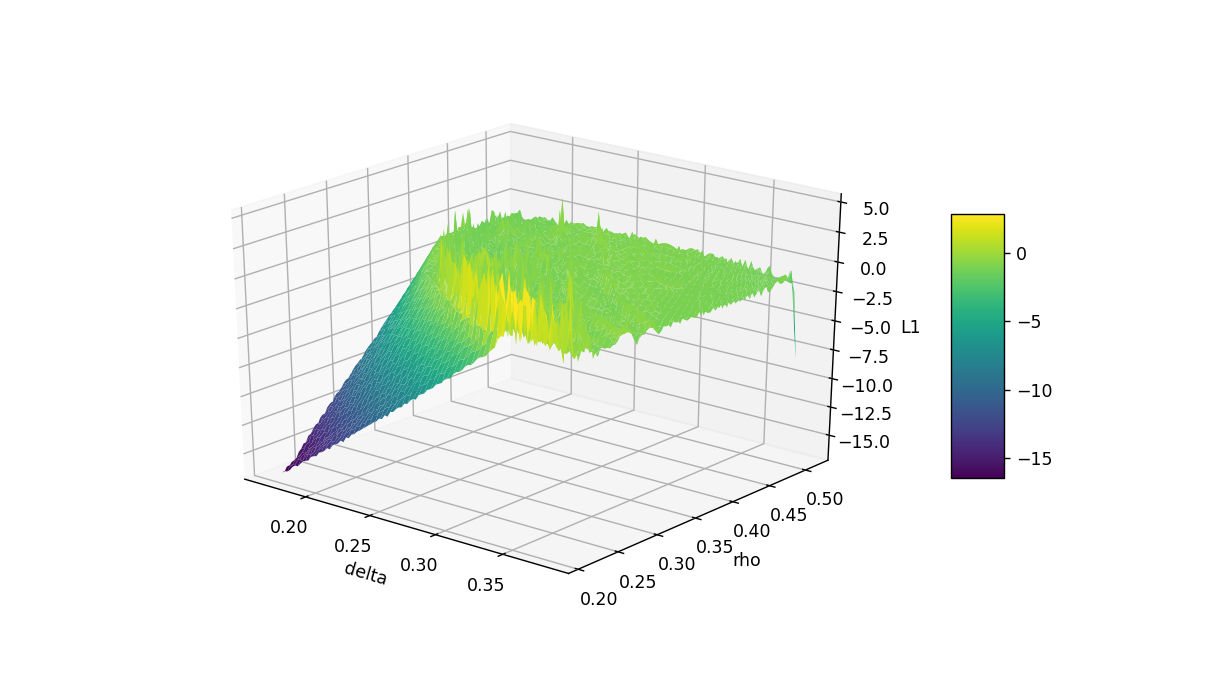

In [44]:
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('delta')
ax.set_ylabel('rho')
ax.set_zlabel('L1')
surf = ax.plot_surface(X, Y, results, cmap='viridis')

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
